In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import yaml

from utils import *

**Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising
model at different temperatures T and magnetic field strengths B. Discuss your strategy for determining
the initial configuration, burn-in steps, total number of steps, and thinning (if any)**

In [2]:
#getting the parameters from the yaml file
with open("config.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
print(config)
STEPS = config['STEPS']
N = config['N']
J = config['J']
KB = config['KB']
T = config['T']
BURNIN = config['BURNIN']
B= config['B']

{'STEPS': 1000000, 'N': 30, 'J': 1, 'KB': 1, 'T': 2, 'BURNIN': 100000, 'B': 1, 'T_C': 2.269}


  0%|          | 0/1000000 [00:00<?, ?it/s]

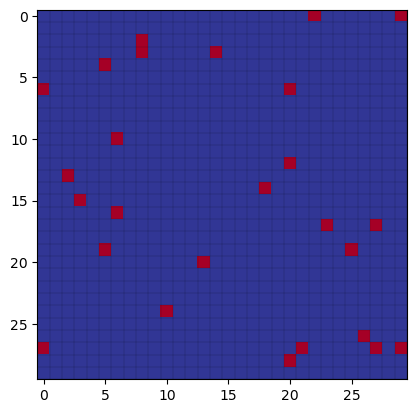

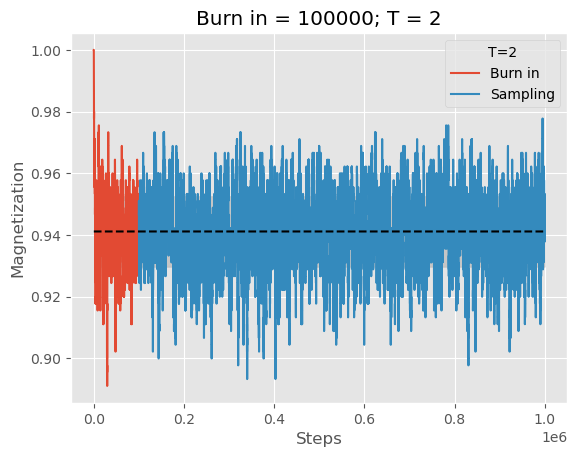

magnetization mean = 0.9411634740740743
magnetization std = 0.011427931582750548


In [3]:
#2d ising model:
m_valuesUP, lattice_spins, steps = spins(steps=STEPS, random=False, B=B)
plot_lattice(lattice_spins)
plot_m(m_valuesUP, burn_in = BURNIN)

In [4]:
temps = np.linspace(1,4,10)
print(temps)
magnetic_field = np.linspace(0,1,3)
print(magnetic_field)

[1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.         3.33333333 3.66666667 4.        ]
[0.  0.5 1. ]


In [7]:
results = np.array([[stats(temp, STEPS, BURNIN, B, display=False) for B in magnetic_field] for temp in temps])


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
print(results[0,0,:])
print(results[0,1,:])
print(results[1,0,:])
print(results[2,0,:])

[0.94104192 0.01099636]
[0.94164765 0.01083949]
[0.9415605  0.01087606]
[0.9409527  0.01152844]


results.shape (4, 3, 2)
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


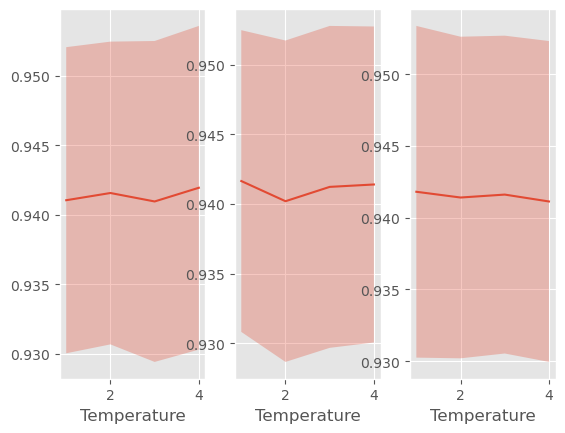

In [ ]:
print("results.shape", results.shape)
axes_shape = (1, len(magnetic_field))
fig, ax = plt.subplots(axes_shape[0], axes_shape[1])
print(ax)
for i in range(len(magnetic_field)):
    curr_plot = results[:,i,0]
    std = results[:,i,1]
    ax[i].plot(temps, curr_plot, label=f"B={magnetic_field[i]}")
    ax[i].fill_between(temps, curr_plot-std, curr_plot+std, alpha=0.3)
    ax[i].set_xlabel("Temperature")
plt.show()


[]

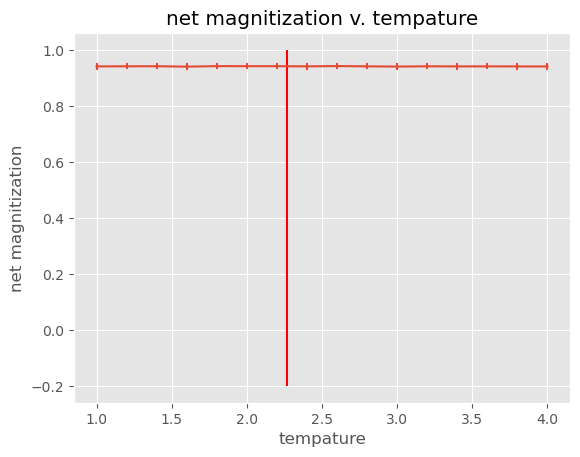

In [ ]:
plt.errorbar(temps, results.T[0], yerr=results.T[1])
plt.vlines([2.269], ymin=-0.2, ymax=1.0, color='red')
plt.title('net magnitization v. tempature')
plt.xlabel('tempature')
plt.ylabel('net magnitization') 
plt.plot()